In [55]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [61]:
def kf(z,x,P,F,Q,R):
    right = np.linalg.inv(P + R)
    K = np.matmul(P,right)
    P = P + Q
    xp =np.array([0,0])
    xp = x.T + np.matmul(K,z.T-x.T)
    xp = xp.T
    P = P - np.matmul(K,P)
    return(xp,P)

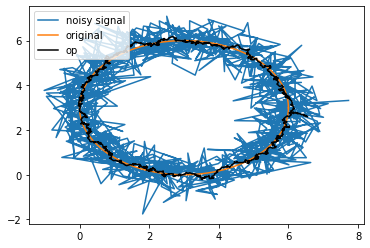

In [72]:
t = np.arange(1000)/1000
x = 3*np.ones(1000) + 3*np.cos(2*np.pi*t)
y = 3*np.ones(1000) + 3*np.sin(2*np.pi*t)
sigma = np.cov(X)
F = np.identity(2)
stddevn = 0.5
noise1 = np.random.normal(0,stddevn,1000)
noise2 = np.random.normal(0,stddevn,1000)
xz = x + noise1
yz = y + noise2
X = np.array([xz,yz])
X = X.T
P = (stddevn**2)*np.identity(2)
Q = 0.5*P
R = 100*P
xt = X[0]
xf = []
for z in X:
    xt,P = kf(z,xt,P,F,Q,R)
    xf.append(xt)
xf = np.array(xf)
xf = xf.T
xw = xf[0]
yw = xf[1]
    
plt.plot(xz,yz,label='noisy signal')
plt.plot(x,y,label='original')
plt.plot(xw,yw,color = 'black',label = 'op')
plt.legend(loc = 'upper left')
plt.show()
plt.show()
